In [166]:
import geopandas as gpd
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [177]:
PATH = '/Users/EF/PycharmProjects/ports-mapping-using-behavioral-vessel-data/features'
CLUSTERED_DATA_FNAME = 'hdbscan_30mcs_5ms_mooring_polygons_with_distance.geojson'
NEW_POLY_FNAME = 'new_polygons_candidates.json'
NEW_PORTS_FNAME = 'new_ports.json'

In [12]:
df = gpd.read_file(os.path.join(PATH, CLUSTERED_DATA_FNAME))

In [13]:
df.shape

(8520, 19)

In [14]:
new_polygons_candidates = df[df['intersection'].isnull()]

In [15]:
new_polygons_candidates.shape

(794, 19)

In [16]:
new_polygons_candidates.head()

,label,probs_of_belonging_to_clust,num_points,area_sqkm,density,mean_duration,median_duration,distance_from_nearest_port,n_unique_vesselID,percent_unique_vesselID,vesselIDs,intersection,geohash,distance_from_shore,nearest_shore_lat,nearest_shore_lng,centroid_lat,centroid_lng,geometry
18,cluster 18,"0.001263,0.001263,1.000000,0.900837,1.000000,1...",49.0,933.097850,2.281415,16.699620,14.319722,4.947840,6.0,0.122449,"5905c3452ec2d44c585302a2,5905c3452ec2d44c58530...",NaN,6x79bf,0.000000,NaN,NaN,-3.899364,-62.541513,"POLYGON ((-63.15333 -4.01333, -63.16198 -3.943..."
19,cluster 19,"1.000000,0.457016,1.000000,1.000000,1.000000,1...",88.0,12.039211,77.355170,33.761932,20.997500,0.199411,5.0,0.056818,"5907e840d3721c61e7661c2a,5907e840d3721c61e7661...",NaN,kzt57y,2.179628,-2.221004,40.940900,-2.205956,40.953436,"POLYGON ((40.99500 -2.22000, 40.93298 -2.21172..."
28,cluster 28,"1.000000,1.000000,1.000000,1.000000,0.205361,1...",35.0,1.201044,219.327649,6.197087,4.351111,224.811678,6.0,0.171429,"595a6b520573e14ee35987ed,595a6b520573e14ee3598...",NaN,e6wkwt,1.866256,14.884516,-24.683696,14.884820,-24.666352,"POLYGON ((-24.64980 14.88044, -24.66700 14.882..."
51,cluster 51,"0.019056,0.019056,0.019056,0.019056,0.019056,0...",58.0,1.316428,17.157920,4.078784,3.983056,10953.417184,1.0,0.017241,"5905c346a696e25879022778,5905c346a696e25879022...",NaN,rbevt9,0.000000,NaN,NaN,-41.214661,174.271390,"POLYGON ((174.23647 -41.24801, 174.23647 -41.2..."
74,cluster 74,"0.268309,1.000000,1.000000,1.000000,1.000000,1...",42.0,46.713614,37.763319,41.934345,25.615278,95.933646,7.0,0.166667,"5909697f994bab5b8b9fcd52,5905d62df222b85491aa2...",NaN,ededww,15.761934,14.642460,-17.187359,14.536838,-17.284801,"POLYGON ((-17.30480 14.48456, -17.30758 14.490..."


In [26]:
#new_polygons_candidates.to_file(os.path.join(PATH, NEW_POLY_FNAME), driver='GeoJSON')

In [18]:
new_polygons_candidates['density'].describe([0.25,0.5,0.75,0.85,0.95])

count      794.000000
mean       313.762694
std        978.425879
min          0.358233
25%         26.765174
50%         91.785260
75%        259.094809
85%        444.438424
95%       1070.496621
max      13603.971754
Name: density, dtype: float64

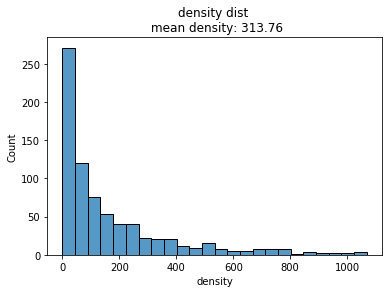

In [17]:
sns.histplot(new_polygons_candidates[new_polygons_candidates['density']<=1070]['density'])
plt.title('density dist \n mean density: %s'% round(new_polygons_candidates['density'].mean(),2));

In [20]:
new_polygons_candidates['distance_from_shore'].describe([0.25,0.5,0.75,0.85,0.95])

count    794.000000
mean       4.319889
std       13.143702
min        0.000000
25%        0.000000
50%        0.656618
75%        2.705572
85%        6.106242
95%       23.158822
max      203.923510
Name: distance_from_shore, dtype: float64

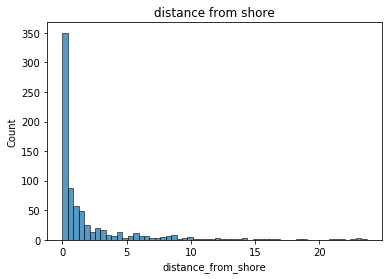

In [21]:
sns.histplot(new_polygons_candidates[new_polygons_candidates['distance_from_shore']<=24]['distance_from_shore'])
plt.title('distance from shore');

In [47]:
# filterong: take as ports only polygons which centroid's distance from shore is less than 5km
new_ports_candidates = new_polygons_candidates[new_polygons_candidates.distance_from_shore<5]
new_ports_candidates.shape

(654, 21)

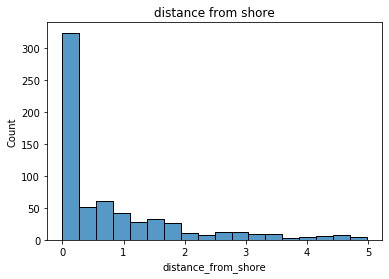

In [31]:
sns.histplot(new_ports_candidates['distance_from_shore'])
plt.title('distance from shore');

In [49]:
# rank = density * number_of_unique_vesselIDs
new_ports_candidates['rank'] = new_ports_candidates['density'] * new_ports_candidates['n_unique_vesselID']

In [52]:
new_ports_candidates_gdf = gpd.GeoDataFrame(
    new_ports_candidates, geometry=gpd.points_from_xy(new_ports_candidates.centroid_lat, new_ports_candidates.centroid_lng))

In [75]:
new_ports_candidates_gdf = new_ports_candidates_gdf.reset_index(drop=True)

In [74]:
new_ports_candidates[new_ports_candidates['label']== 'cluster 8467']

,label,probs_of_belonging_to_clust,num_points,area_sqkm,density,mean_duration,median_duration,distance_from_nearest_port,n_unique_vesselID,percent_unique_vesselID,...,intersection,geohash,distance_from_shore,nearest_shore_lat,nearest_shore_lng,centroid_lat,centroid_lng,geometry,rank,rank_scaled
8467,cluster 8467,"1.000000,1.000000,1.000000,1.000000,0.976959,1...",31.0,0.014376,1549.520183,12.881819,10.151389,1010.893858,28.0,0.903226,...,NaN,w21z2c,1.305075,1.281639,103.739528,1.284817,103.750816,POINT (1.285 103.751),43386.56513,0.402948


In [66]:
#new_polygons_candidates.to_file(os.path.join(PATH, NEW_POLY_FNAME), driver='GeoJSON')

In [154]:
ranks_ordered = new_ports_candidates_gdf.sort_values('rank_scaled', ascending=False).loc[:, ['label','rank','centroid_lat','centroid_lng','geometry']].reset_index(drop=True)

In [155]:
ranks_ordered.head()

,label,rank,centroid_lat,centroid_lng,geometry
0,cluster 7358,107667.111491,51.689270,4.407096,POINT (51.689 4.407)
1,cluster 7449,100469.222276,51.690032,4.406832,POINT (51.690 4.407)
2,cluster 7335,87369.998726,51.688569,4.407316,POINT (51.689 4.407)
3,cluster 6985,86656.903481,52.468030,4.599701,POINT (52.468 4.600)
4,cluster 8462,84341.956153,1.279442,103.744980,POINT (1.279 103.745)


In [156]:
def get_multipolygon_port(ranks_ordered):
    ports = []
    for clust_ind in range(ranks_ordered.shape[0]):
        
        clust_floored_lat = np.int(np.floor(ranks_ordered.loc[clust_ind,'centroid_lat']))
        clust_floored_lng = np.int(np.floor(ranks_ordered.loc[clust_ind,'centroid_lng']))
                
        if clust_ind == 0:
            ports.append(str(clust_floored_lat) + '_' + str(clust_floored_lng))
            ranks_ordered.loc[clust_ind,'port_temp_tag'] = str(clust_floored_lat) + '_' + str(clust_floored_lng)
        else:
            for port in ports:
                port_lat = np.int(port.split('_')[0])
                port_lng = np.int(port.split('_')[1])
                if (port_lat-1 <= clust_floored_lat <= port_lat+1) & (port_lng-1 <= clust_floored_lng <= port_lng+1):
                    ranks_ordered.loc[clust_ind,'port_temp_tag'] = port
                    break
            if pd.isnull(ranks_ordered.loc[clust_ind,'port_temp_tag']):
                ports.append(str(clust_floored_lat) + '_' + str(clust_floored_lng))
                ranks_ordered.loc[clust_ind,'port_temp_tag'] = str(clust_floored_lat) + '_' + str(clust_floored_lng)
    return ranks_ordered
                    
                         

In [158]:
ranks_ordered = get_multipolygon_port(ranks_ordered)

In [172]:
ranks_ordered[ranks_ordered.port_temp_tag == '51_4']['rank'].max()

107667.11149064991

In [173]:
top_ports = pd.DataFrame()
top_ports['portID'] = ranks_ordered.port_temp_tag.unique()
for i, port_id in enumerate(top_ports.portID):
    subset = ranks_ordered[ranks_ordered.port_temp_tag == port_id]
    top_ports.loc[i, 'label'] = f'port {i}'
    top_ports.loc[i, 'num_clusters'] = subset.shape[0]
    top_ports.loc[i, 'max_rank'] = subset['rank'].max()
    top_ports.loc[i, 'mean_lat'] = subset.centroid_lat.mean()
    top_ports.loc[i, 'mean_lng'] = subset.centroid_lng.mean()
    


In [174]:
# scale the rank
x = top_ports['max_rank'].values.astype(float).reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
top_ports['rank_scaled'] = min_max_scaler.fit_transform(x)

In [175]:
top_ports

,portID,label,num_clusters,max_rank,mean_lat,mean_lng,rank_scaled
0,51_4,port 0,37.0,107667.111491,51.789051,4.616401,1.000000
1,1_103,port 1,17.0,84341.956153,1.272441,103.757916,0.783351
2,36_-77,port 2,1.0,71525.636008,36.916856,-76.338478,0.664310
3,43_131,port 3,2.0,70426.851816,42.983291,131.678420,0.654104
4,-23_-44,port 4,1.0,47122.839750,-22.942169,-43.834062,0.437652
...,...,...,...,...,...,...,...
190,71_127,port 190,1.0,16.125988,71.450288,127.023837,0.000115
191,-4_-63,port 191,1.0,13.688488,-3.899364,-62.541513,0.000092
192,67_125,port 192,1.0,7.164667,67.065487,125.418750,0.000031
193,70_148,port 193,1.0,5.123216,70.068023,148.367817,0.000012


In [176]:
top_ports_gdf = gpd.GeoDataFrame(
    top_ports, geometry=gpd.points_from_xy(top_ports.mean_lat, top_ports.mean_lng))

In [178]:
new_ports_candidates.to_file(os.path.join(PATH, NEW_PORTS_FNAME), driver='GeoJSON')